# 1. Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

# 2. Data Inspection

In [2]:
# load the data
df = pd.read_csv('data.csv')

# inspect the first few rows of the dataframe
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# inspect the date feature
df.date.min(),df.date.max()

('2014-05-02 00:00:00', '2014-07-10 00:00:00')

It looks like the **date** feature represents when data about the properties were collected, which was between May and July, 2014. We can drop this column as it won't contribute to our anaysis.

In [4]:
df.drop('date',axis=1,inplace=True)

All the houses in the dataset are located in Washington so we can extract only the zip codes

In [5]:
df['zip'] = df.statezip.str.split(expand=True)[1]
df.drop('statezip',axis=1,inplace=True)

Let's see the countries represented in the dataset

In [6]:
df.country.unique()

array(['USA'], dtype=object)

The **country** column does not give any additional information since our dataset contains only records of houses in USA.  

In [7]:
# drop country column
df.drop('country',axis=1,inplace=True)

Let's get a summary of our data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  zip            4600 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 575.1+ KB


The dataset now contains 4600 rows and 17 columns with no missing values. Let's get a summary of our numerical features

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


The minimum price is zero dollar. Our model could learn spurious patterns based on these entries.

How many houses cost $0? 

In [10]:
len(df[df.price==0])

49

We wouldn't be throwing away much information by removing these records.

In [11]:
drop = df[df.price==0].index
df.drop(drop,inplace=True)

We have barely scratched the surface. Let's split our data before doing EDA

In [12]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.25,random_state=42)

# reset the index of the train and test sets
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

train.shape, test.shape

((3413, 16), (1138, 16))

# 3. Exploratory Data Analysis (EDA)

Before  proceeding, we'll create a copy of our train set. 

In [13]:
# create a copy of train set
housing = train.copy()

# inspect random rows from train set
housing.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,zip
1128,370000.000000,3.0,1.75,1650,8254,1.0,0,0,5,1060,590,1951,0,18015 25th Ave NE,Shoreline,98155
1538,280000.000000,3.0,2.00,1790,42399,1.0,0,0,4,1790,0,1990,0,15611 SE 322nd Pl,Auburn,98092
838,599950.000000,3.0,2.50,2660,4975,2.0,0,0,3,2660,0,2014,0,4810 S Raymond St,Seattle,98118
343,495000.000000,3.0,1.75,1440,11787,1.0,0,0,3,1440,0,1983,2009,22913 NE 20th Pl,Sammamish,98074
1391,439333.333333,3.0,3.50,3020,4082,2.0,0,0,3,2080,940,1954,2004,3401-3599 Arapahoe Pl W,Seattle,98199


Let's see the distribution of the features

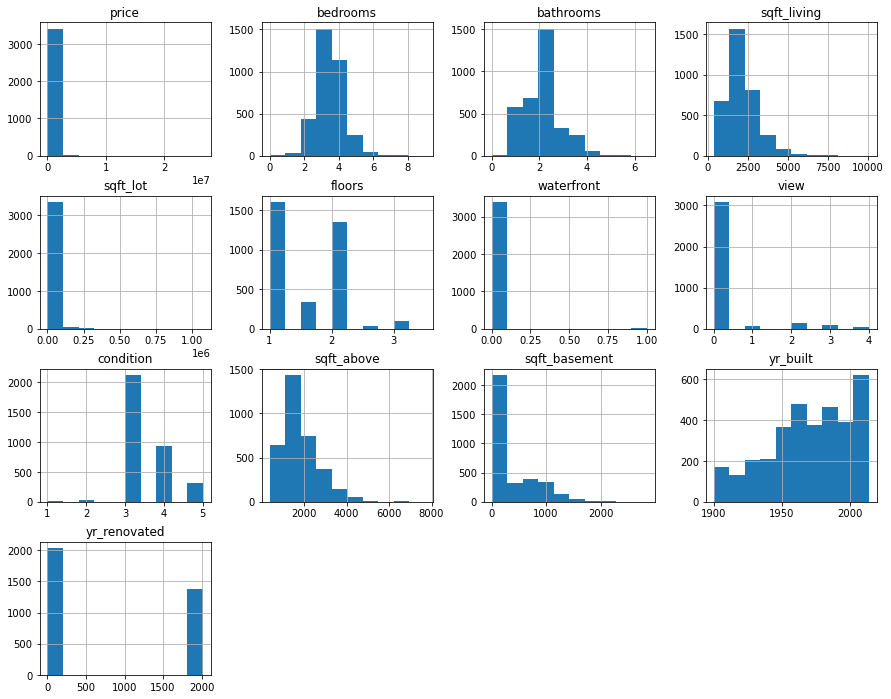

In [14]:
housing.hist(figsize=(15,12));

- Some variables have greater magnitude and wide ranges than others. Scaling these variables gives each variable equal importance in predicting the target  
  
  
- Some of the variables are heavily skewed. Normalizing these variables gives them a more bell-shaped distribuition


- More specifically, there's a spike at zero for some features. This could be because some houses lack these facilities and/or were not renovated. We can create columns to indicate this information (e.g **has_basement**).
  
  
- More houses were built as the years went by. 

What features affect **price** the most and how?

In [15]:
# check for correlations
housing.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.398797
sqft_above       0.344411
bathrooms        0.300575
view             0.208062
bedrooms         0.183622
sqft_basement    0.178289
floors           0.142283
waterfront       0.118383
condition        0.046663
sqft_lot         0.040218
yr_built         0.018002
yr_renovated    -0.031574
Name: price, dtype: float64

- Most features affect price positively with **sqft_living** showing the strongest positive relationship

- Only **yr_renovated** shows a negative relationship with price

Let's visualize the relationships between some of these features and price

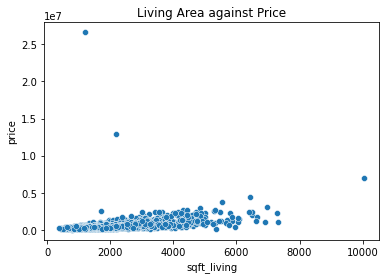

In [16]:
sns.scatterplot(x='sqft_living',y='price',data=housing)
plt.title('Living Area against Price');

The two outlier prices have squished our visualization. We'll exclude these points from our visualizations

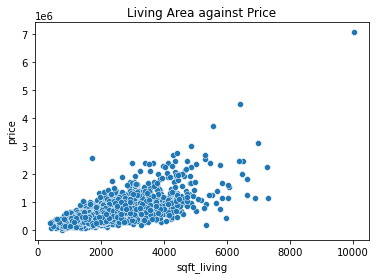

In [17]:
sns.scatterplot(x='sqft_living',y='price',data=housing[housing.price<10**7])
plt.title('Living Area against Price');

The house with largest living area costs the most

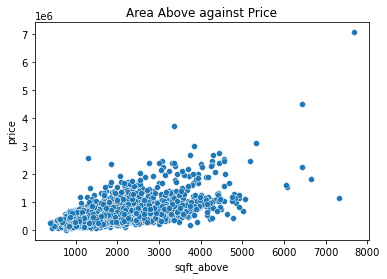

In [18]:
sns.scatterplot(x='sqft_above',y='price',data=housing[housing.price<10**7])
plt.title('Area Above against Price');

It happens that the house with the largest area above costs the most. This could be the same house that has the largest living area. It is possible that **sqft_living** and **sqft_above** are correlated

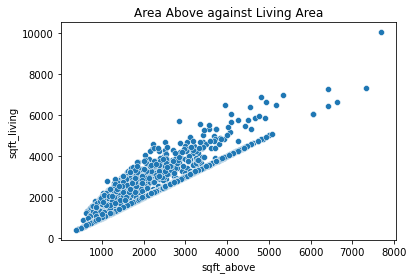

In [19]:
sns.scatterplot(x='sqft_above',y='sqft_living',data=housing[housing.price<10**7])
plt.title('Area Above against Living Area');

Unsuprisingly, there's a strong positive relationship between these two features

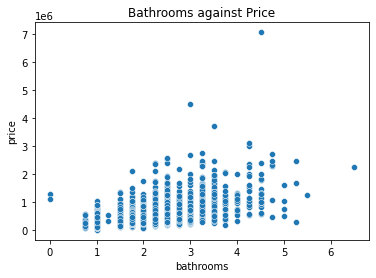

In [20]:
sns.scatterplot(x='bathrooms',y='price',data=housing[housing.price<10**7])
plt.title('Bathrooms against Price');

Although not strong, the number of bathrooms affects house price positively. However, the most expensive houses have between 3 to 5 bathrooms.

Now let's see how categorical features affect house prices

In [21]:
# handpick some categorical attributes
categories = ['yr_built','yr_renovated','waterfront','view','condition','city']

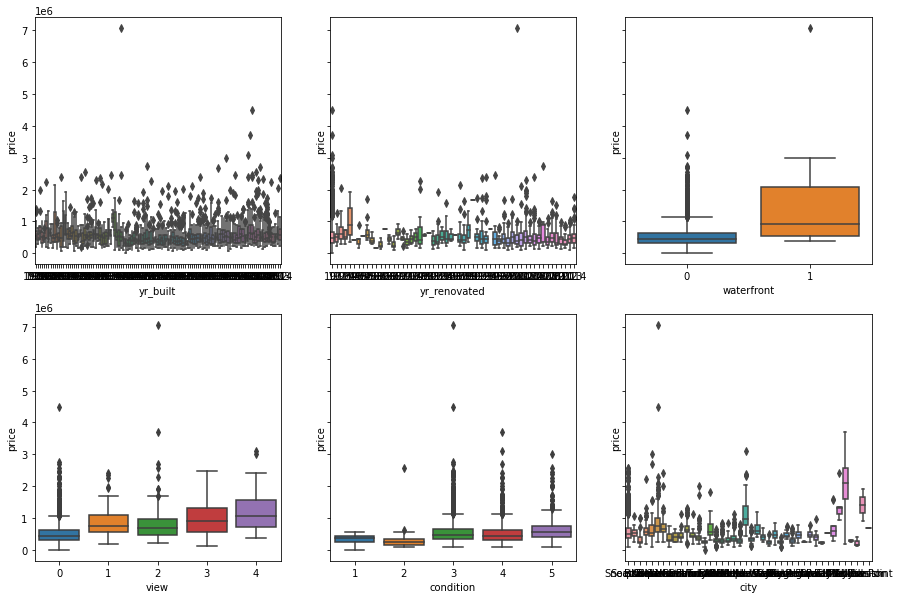

In [22]:
# to create a dashboard for the boxplots
f,axes=plt.subplots(2,3, sharey=True, figsize=(15,10))

# to plot the boxplots on the dashboard
for i in range(len(categories)):
    row = i//3
    col = i%3
    sns.boxplot(x=categories[i],y='price',data=housing[housing.price<10**7],ax = axes[row,col] )

There seems to be a slight relationship between price and most of the categorical variables

# Data Preprocessing

## Outliers

Firstly, let's check for and remove outliers

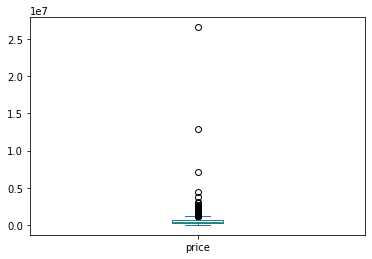

In [23]:
train.price.plot(kind='box');

Let's remove the two extreme values

In [24]:
# get the index of the outliers
outliers = train[train.price>10**7].index

# remove outliers
train.drop(outliers,inplace=True)

# reset index
train.reset_index(drop=True,inplace=True)

# confirm the absence of outliers
(train.price>10**7).sum()

0

## Feature Engineering

- In the EDA process, some variables had a spike at zero which could indicate the absence of a value or a unique category. **waterfront** and **view** are categorical variables so, a zero value could represent a unique category. A zero value in **sqft_basement** could indicate the absence of a basement while for **yr_renovated**, it could mean that a house was not renovated. Hence, we'll only create indicator variables for **sqft_basement** and **yr_renovated**


- According to Wikipedia, the first digit of a zip code represents the state ('9' corresponds to Washington), the second and third digits represent the region (or perhaps a large city) while the last two digits represent the the area of the city(for metropolitan areas) or a village/town (outside metro areas). 


- The street column contains information about road type and quadrant. We can also engineer some new features from the existing ones (e.g total_rooms, landspace, facilities e.t.c)

There's a preprocessing file in the root directory where I have created custom tranformers. We'll simply import and use them 

In [25]:
from preprocessing import Add_attr
attr_adder = Add_attr()
feat_eng = attr_adder.fit_transform(train)
feat_eng.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,zip,has_basement,was_renovated,region,quadrant,road_type,total_rooms,livarea/bedroom,lotarea/bedroom,livarea/bathroom,lotarea/bathroom,land_space,total_space,landspace/room,totspace/room,facilities,score
0,635000.0,3.0,2.50,2300,5500,1.5,0,0,4,2000,300,1921,0,2739 31st Ave S,Seattle,98144,1,0,2,UNKNOWN,Ave,5.50,766.666667,1833.333333,920.000000,2200.000000,7800,10100,1418.181818,1836.363636,4,16
1,405000.0,3.0,2.25,1520,1245,3.0,0,0,3,1520,0,2004,2003,8502 Interlake Ave N,Seattle,98103,0,1,2,UNKNOWN,Ave,5.25,506.666667,415.000000,675.555556,553.333333,2765,4285,526.666667,816.190476,3,9
2,567500.0,3.0,2.50,2300,7398,2.0,0,0,3,2300,0,2001,0,7075-7131 Thompson Ave SE,Snoqualmie,98065,0,0,1,SE,Ave,5.50,766.666667,2466.000000,920.000000,2959.200000,9698,11998,1763.272727,2181.454545,3,9
3,359000.0,5.0,1.75,1940,6654,1.5,0,0,4,1940,0,1953,1983,15212 20th Ave SW,Burien,98166,0,1,2,SW,Ave,6.75,388.000000,1330.800000,1108.571429,3802.285714,8594,10534,1273.185185,1560.592593,3,12
4,494815.0,3.0,2.50,1910,2091,2.0,0,0,3,1910,0,2014,0,1273 NE Hickory Ln,Issaquah,98029,0,0,1,NE,Ln,5.50,636.666667,697.000000,764.000000,836.400000,4001,5911,727.454545,1074.727273,3,9


Let's create seperate lists of numerical and categorical features. We'll be excluding the price and street columns

In [26]:
# select numerical attributes
num_attrs = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above',
            'sqft_basement','yr_built','yr_renovated','total_rooms','livarea/bedroom',
            'lotarea/bedroom','livarea/bathroom','lotarea/bathroom','land_space','total_space',
            'landspace/room','totspace/room','facilities','score']

# select categorical attributes
cat_attrs = ['waterfront','view','condition','city','zip','has_basement','was_renovated',
            'region','quadrant','road_type']

# confirm if all the columns have been included
len(num_attrs)+len(cat_attrs)+2 == feat_eng.shape[1]

True

## Encoding Categories

Let's see the unique values in each categorical column

In [27]:
for attr in cat_attrs:
    print(attr, feat_eng[attr].unique())

waterfront [0 1]
view [0 2 1 4 3]
condition [4 3 5 2 1]
city ['Seattle' 'Snoqualmie' 'Burien' 'Issaquah' 'Kirkland' 'Bellevue'
 'Sammamish' 'Carnation' 'Black Diamond' 'Kenmore' 'Redmond'
 'Normandy Park' 'Shoreline' 'Tukwila' 'Woodinville' 'Kent' 'Auburn'
 'Des Moines' 'Renton' 'Federal Way' 'Mercer Island' 'Maple Valley'
 'Newcastle' 'North Bend' 'SeaTac' 'Vashon' 'Covington' 'Bothell'
 'Enumclaw' 'Ravensdale' 'Algona' 'Lake Forest Park' 'Duvall' 'Pacific'
 'Snoqualmie Pass' 'Fall City' 'Clyde Hill' 'Medina' 'Milton' 'Skykomish'
 'Yarrow Point' 'Preston']
zip ['98144' '98103' '98065' '98166' '98029' '98034' '98004' '98074' '98107'
 '98106' '98005' '98014' '98006' '98010' '98028' '98053' '98126' '98118'
 '98102' '98052' '98133' '98178' '98146' '98077' '98112' '98030' '98117'
 '98002' '98198' '98059' '98033' '98023' '98042' '98040' '98136' '98155'
 '98115' '98092' '98038' '98116' '98045' '98188' '98058' '98108' '98003'
 '98027' '98070' '98031' '98072' '98075' '98199' '98011' '98022' '9

We can easily deduce that **waterfront**, **has_basement**, and **was_renovated** are ordinal variables. The remaining variables are nominal and have to be dummy encoded(i.e a column for each unique value). 

However, some columns contain too many unique values (city, zip, road_type). This can result into too many columns. We'll use target encoding for these columns

We'll be target encoding with **sqft_living** and **sqft_lot**. It is reasonable for properties in the same location to have similar living area and lot size. 

We'll add these two columns to the categorical attributes just for target encoding. The resulting dataframe won't contain these columns

In [28]:
cat_attrs.extend(['sqft_living','sqft_lot'])
feat_eng[cat_attrs].head()

,waterfront,view,condition,city,zip,has_basement,was_renovated,region,quadrant,road_type,sqft_living,sqft_lot
0,0,0,4,Seattle,98144,1,0,2,UNKNOWN,Ave,2300,5500
1,0,0,3,Seattle,98103,0,1,2,UNKNOWN,Ave,1520,1245
2,0,0,3,Snoqualmie,98065,0,0,1,SE,Ave,2300,7398
3,0,0,4,Burien,98166,0,1,2,SW,Ave,1940,6654
4,0,0,3,Issaquah,98029,0,0,1,NE,Ln,1910,2091


Let's import the custom transformer and transform the categorical variables

In [29]:
from preprocessing import Encode
encoder = Encode()
encoded = encoder.fit_transform(feat_eng[cat_attrs])
encoded

,waterfront,has_basement,was_renovated,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,region_1,region_2,region_3,region_4,quadrant_NE,quadrant_NW,quadrant_SE,quadrant_SW,quadrant_UNKNOWN,sqft_city,sqft_zip,sqft_roadtype,lot_city,lot_zip,lot_roadtype
0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,1910.955882,2003.008130,5301.785534,4287.705882,13366.500000
1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,1792.727273,2003.008130,5301.785534,3388.809091,13366.500000
2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2597.115385,2597.115385,2003.008130,20398.442308,20398.442308,13366.500000
3,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1735.545455,1858.690476,2003.008130,12541.436364,14899.880952,13366.500000
4,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2420.278571,2302.333333,2433.848485,27904.314286,11239.015152,14421.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2092.405063,2092.405063,2064.859466,15057.303797,15057.303797,15436.173055
3407,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,1792.727273,2003.008130,5301.785534,3388.809091,13366.500000
3408,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1776.701031,1701.369863,2003.008130,8898.969072,9685.205479,13366.500000
3409,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,2327.735849,2003.008130,5301.785534,4635.000000,13366.500000


We'll only pass the numerical columns. Let's build a pipeline to handle all preprocessing steps.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from preprocessing import Pass

num_and_cat = ColumnTransformer([('passthrough',Pass(),num_attrs),
                                 ('encoder',Encode(m=1,n=1),cat_attrs)])

preprocessor = Pipeline([('adder',Add_attr()),
                         ('pass_and_encode',num_and_cat)])

**m** and **n** represent the smoothing parameters for **sqft_living** and **sqft_lot** target encoders respectively

**ColumnTransformer** returns an array. It also concatenates the values in the specified order (i.e num_attrs followed by resulting cat_attrs).

Let's recreate the dataframe

In [31]:
# create a list of the resulting features
all_feats = num_attrs + list(encoder.cat_cols)

# recreate the dataframe
X = pd.DataFrame(preprocessor.fit_transform(train),columns=all_feats)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,total_rooms,livarea/bedroom,lotarea/bedroom,livarea/bathroom,lotarea/bathroom,land_space,total_space,landspace/room,totspace/room,facilities,score,waterfront,has_basement,was_renovated,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,region_1,region_2,region_3,region_4,quadrant_NE,quadrant_NW,quadrant_SE,quadrant_SW,quadrant_UNKNOWN,sqft_city,sqft_zip,sqft_roadtype,lot_city,lot_zip,lot_roadtype
0,3.0,2.50,2300.0,5500.0,1.5,2000.0,300.0,1921.0,0.0,5.50,766.666667,1833.333333,920.000000,2200.000000,7800.0,10100.0,1418.181818,1836.363636,4.0,16.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,1910.955882,2003.008130,5301.785534,4287.705882,13366.500000
1,3.0,2.25,1520.0,1245.0,3.0,1520.0,0.0,2004.0,2003.0,5.25,506.666667,415.000000,675.555556,553.333333,2765.0,4285.0,526.666667,816.190476,3.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,1792.727273,2003.008130,5301.785534,3388.809091,13366.500000
2,3.0,2.50,2300.0,7398.0,2.0,2300.0,0.0,2001.0,0.0,5.50,766.666667,2466.000000,920.000000,2959.200000,9698.0,11998.0,1763.272727,2181.454545,3.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2597.115385,2597.115385,2003.008130,20398.442308,20398.442308,13366.500000
3,5.0,1.75,1940.0,6654.0,1.5,1940.0,0.0,1953.0,1983.0,6.75,388.000000,1330.800000,1108.571429,3802.285714,8594.0,10534.0,1273.185185,1560.592593,3.0,12.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1735.545455,1858.690476,2003.008130,12541.436364,14899.880952,13366.500000
4,3.0,2.50,1910.0,2091.0,2.0,1910.0,0.0,2014.0,0.0,5.50,636.666667,697.000000,764.000000,836.400000,4001.0,5911.0,727.454545,1074.727273,3.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2420.278571,2302.333333,2433.848485,27904.314286,11239.015152,14421.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,3.0,1.00,1200.0,9936.0,1.0,1200.0,0.0,1969.0,0.0,4.00,400.000000,3312.000000,1200.000000,9936.000000,11136.0,12336.0,2784.000000,3084.000000,3.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2092.405063,2092.405063,2064.859466,15057.303797,15057.303797,15436.173055
3407,4.0,2.00,2520.0,6000.0,1.0,1400.0,1120.0,1921.0,2007.0,6.00,630.000000,1500.000000,1260.000000,3000.000000,8520.0,11040.0,1420.000000,1840.000000,4.0,12.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,1792.727273,2003.008130,5301.785534,3388.809091,13366.500000
3408,3.0,1.00,1150.0,8145.0,1.0,990.0,160.0,1932.0,1958.0,4.00,383.333333,2715.000000,1150.000000,8145.000000,9295.0,10445.0,2323.750000,2611.250000,4.0,16.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1776.701031,1701.369863,2003.008130,8898.969072,9685.205479,13366.500000
3409,2.0,1.00,910.0,2002.0,1.5,910.0,0.0,1900.0,2005.0,3.00,455.000000,1001.000000,910.000000,2002.000000,2912.0,3822.0,970.666667,1274.000000,3.0,9.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1833.560976,2327.735849,2003.008130,5301.785534,4635.000000,13366.500000


# 5. Model Training and Evaluation

In [32]:
# seperate features from target
X_train = train.drop('price',axis=1)
y_train = train.price

X_test = test.drop('price',axis=1)
y_test = test.price

We can proceed to training and evaluating machine learning models on our preprocessed data.

In [33]:
# import some models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# import the evaluation function
from sklearn.metrics import mean_absolute_error as mae

In [34]:
# create a list of models
models = [LinearRegression(),
          Lasso(),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          ExtraTreesRegressor(random_state=42),
          GradientBoostingRegressor(random_state=42),
          AdaBoostRegressor(random_state=42),
          XGBRegressor(random_state=42),
          LGBMRegressor(random_state=42),
          CatBoostRegressor(random_state=42,verbose=0)
         ]

In [35]:
prepared_train = preprocessor.fit_transform(X_train)
train_target = y_train

Let's get the train scores

In [36]:
for model in models:
    model.fit(prepared_train,train_target)
    train_predictions = model.predict(prepared_train)
    print(f'{model.__class__.__name__}: {mae(train_target,train_predictions)}') 

LinearRegression: 123488.37156764015
Lasso: 124424.05427754925
DecisionTreeRegressor: 16.41747288185283
RandomForestRegressor: 35232.181424675066
ExtraTreesRegressor: 16.41747288186036
GradientBoostingRegressor: 80167.19404883453
AdaBoostRegressor: 252634.50964897804
XGBRegressor: 23850.96421392246
LGBMRegressor: 54382.604742208976
CatBoostRegressor: 46224.49989847596


Let's get the average validation scores using cross validation

In [37]:
# import the cross validation function
from sklearn.model_selection import cross_val_score

# calculate mae for each model
for model in models:
    pipeline = Pipeline([('preprocessor',preprocessor),('model',model)])
    scores = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')
    scores = np.abs(scores)
    print(f'{model.__class__.__name__}:\n\tMEAN: {np.mean(scores)}\n\tSTD: {np.std(scores)}')

LinearRegression:
	MEAN: 127078.29573175048
	STD: 4687.2485856442345
Lasso:
	MEAN: 127867.69217528022
	STD: 5112.749741453614
DecisionTreeRegressor:
	MEAN: 136791.21348954065
	STD: 9450.185409676285
RandomForestRegressor:
	MEAN: 98821.74763313841
	STD: 3693.8604811289138
ExtraTreesRegressor:
	MEAN: 97642.35503714546
	STD: 5440.077911335703
GradientBoostingRegressor:
	MEAN: 101094.52457736844
	STD: 4227.7395766863965
AdaBoostRegressor:
	MEAN: 224584.12546455502
	STD: 18348.273122503837
XGBRegressor:
	MEAN: 100086.1507863209
	STD: 4456.243623486689
LGBMRegressor:
	MEAN: 94717.3103808666
	STD: 2544.007671660266
CatBoostRegressor:
	MEAN: 88365.38540533221
	STD: 4560.06163077483


The boosting algorithms perform better than others with **CatBoostRegressor** performing the best

Linear Regressor underfits very badly

Lasso and AdaBoost Regressor do not perform so well on both train and validation data. This is a sign of underfitting.

Underfitting occurs when the model fails to capture relevant patterns. Possible solutions include: Adding relevant features like Polynomial features or Trying out complex models

Decision Tree and Extra Tree, on the other hand, do not look as shiny as they did on the train set. Infact, Decision Tree performs worse than the linear models on unseen data. This is a sign of overfitting. The remaining boosting algorithms are also overfitting

Overfitting occurs when the model captures spurious patterns. Possible solutions include: Constraining the model, reducing noise in the data or gathering more training data.

Let's visualize the most important price predictors with CatboostRegressor's feature importance

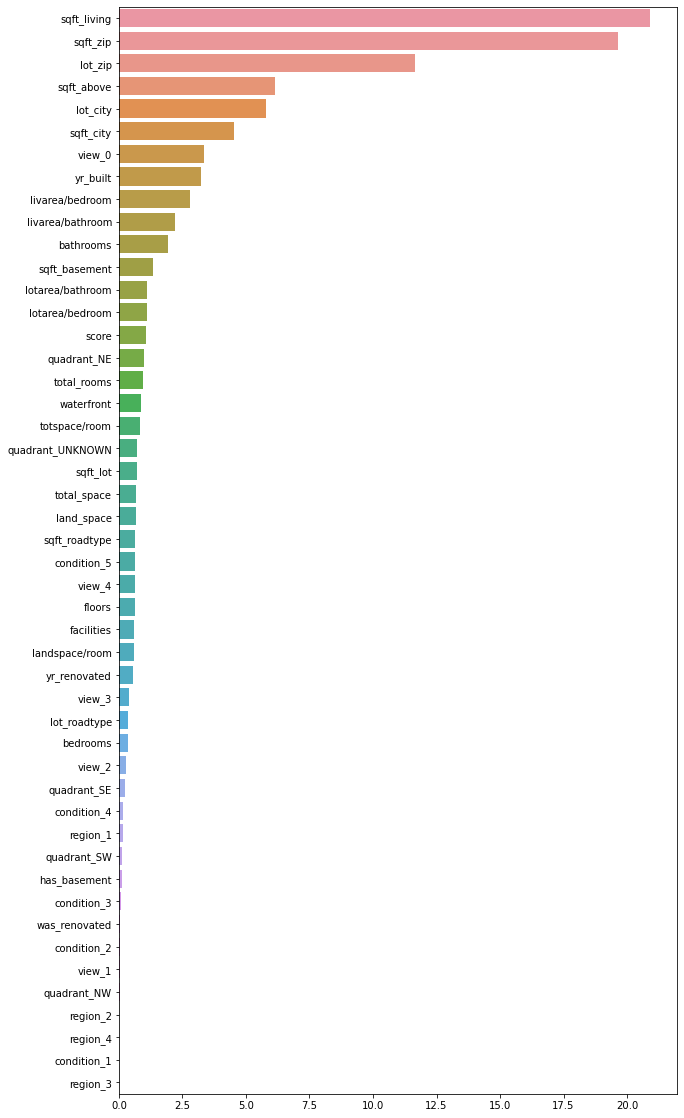

In [38]:
forest = CatBoostRegressor(random_state=42, verbose=0)
forest.fit(prepared_train,train_target)
importances = sorted(list(zip(forest.feature_importances_,all_feats)),reverse=True)
x_axis = [x[0] for x in importances]
y_axis = [x[1] for x in importances]
plt.figure(figsize=(10,20))
sns.barplot(x=x_axis,y=y_axis);

- The Livable area of a house is a huge predictor of its price.

- Some of our engineered features are top predictors. Most of the top predictors can be classified into **size**, **location**, **condition**, and **facilities**

These are what a buyer might think about before deciding to purchase a property.

Some features contribute very little to price. Let's train our models on the top 30 features.

In [39]:
top_feats = y_axis 

In [40]:
# save the unordered features in a python file
with open('all_features.py','w') as f:
    f.write(f'all_feats={all_feats}')

with open('FlaskAPI/all_features.py','w') as f:
    f.write(f'all_feats={all_feats}')

# save the ordered features in a python file
with open('top_features.py','w') as f:
    f.write(f'top_feats={top_feats}') 
    
with open('FlaskAPI/top_features.py','w') as f:
    f.write(f'top_feats={top_feats}')

In [41]:
from preprocessing import Select

# redefine the preprocessor    
preprocessor = Pipeline([('adder',Add_attr()),
                         ('encode_and_pass',num_and_cat),
                         ('selector',Select(n=30))])

In [42]:
# get validation scores
for model in models:
    pipeline = Pipeline([('preprocessor',preprocessor),('model',model)])
    scores = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')
    scores = np.abs(scores)
    print(f'{model.__class__.__name__}:\n\tMEAN: {np.mean(scores)}\n\tSTD: {np.std(scores)}')

LinearRegression:
	MEAN: 136785.96748293
	STD: 4640.081390210722
Lasso:
	MEAN: 137867.6841609687
	STD: 4846.040735191304
DecisionTreeRegressor:
	MEAN: 135500.01574606885
	STD: 6752.964242626716
RandomForestRegressor:
	MEAN: 98841.31894880935
	STD: 3561.748596725976
ExtraTreesRegressor:
	MEAN: 97952.86118935411
	STD: 5931.63522743447
GradientBoostingRegressor:
	MEAN: 100801.78495638233
	STD: 4473.787686396439
AdaBoostRegressor:
	MEAN: 236931.4785107221
	STD: 19834.153676716047
XGBRegressor:
	MEAN: 100298.75540886863
	STD: 5299.651523489281
LGBMRegressor:
	MEAN: 95695.30560127397
	STD: 3579.538221320701
CatBoostRegressor:
	MEAN: 88556.59136499766
	STD: 4512.153004092012


CatBoost Regressor gives a similar result with fewer features.

# 6. Averaging and Stacking Best Models

Let's test the performance of the best performing models on the test set

In [43]:
best_models = [CatBoostRegressor(random_state=42,verbose=0),
              ExtraTreesRegressor(random_state=42),
              LGBMRegressor(random_state=42),
              XGBRegressor(random_state=42),
              RandomForestRegressor(random_state=42)]

# fit the preprocessor on the train set
prepared_train = preprocessor.fit_transform(X_train)
train_target = y_train

# transform the test set 
prepared_test = preprocessor.transform(X_test)
test_target = y_test

# get the mae on the test set for each model
for model in best_models:
    model.fit(prepared_train,train_target)
    test_predictions = model.predict(prepared_test)
    print(f'{model.__class__.__name__}: {mae(test_target,test_predictions)}') 

CatBoostRegressor: 90818.50067645016
ExtraTreesRegressor: 100863.34075164622
LGBMRegressor: 95618.46634005754
XGBRegressor: 98691.23526140818
RandomForestRegressor: 102053.15089154517


Yet again, CatBoost gives the best performance

## Averaging

Let's average the predictions across the models and evaluate the performance

In [44]:
cat_preds = best_models[0].predict(prepared_test)
etrees_preds = best_models[1].predict(prepared_test)
lgbm_preds = best_models[2].predict(prepared_test)
average_preds = (cat_preds+etrees_preds+lgbm_preds)/3
mae(test_target,average_preds)

91116.59024233693

## Stacking

The average predictor doesn't perform as well as CatBoostRegressor. Let's try a meta learner. 

We'll create a validation set from the train set and train the meta learner on the predictions of the validation set.

In [45]:
X_meta,X_val,y_meta,y_val=train_test_split(prepared_train,train_target,test_size=0.4)

In [46]:
# train individual models on the train set
cat = best_models[0].fit(X_meta,y_meta)
etrees = best_models[1].fit(X_meta,y_meta)
lgbm = best_models[2].fit(X_meta,y_meta)

In [47]:
# get validation set predictions
cat_preds = cat.predict(X_val)
etrees_preds = etrees.predict(X_val)
lgbm_preds = lgbm.predict(X_val)

In [48]:
# train meta learner
meta_learner = LinearRegression()
meta_features = np.c_[cat_preds,etrees_preds,lgbm_preds]
meta_learner.fit(meta_features,y_val)

LinearRegression()

In [49]:
# get predictions from individual models on test set
cat_test_pred = cat.predict(prepared_test)
etrees_test_pred = etrees.predict(prepared_test)
lgbm_test_pred = lgbm.predict(prepared_test)

# concatenate predictions
all_preds = np.c_[cat_test_pred,etrees_test_pred,lgbm_test_pred]

# make final prediction with meta-learner
final_preds = meta_learner.predict(all_preds)

# evaluate performance
mae(test_target,final_preds)

95239.14433405272

The meta learner performs worse than the averaging model

# 7. Conclusion

In [50]:
print(f'MEAN:\t{test.price.mean()}\nSTD:\t{test.price.std()}')

MEAN:	556628.2333485465
STD:	375153.92487540067


- **CatboostRegressor** performs the best on the test set with an average error of around 90,000. This is a decent performance given that the average house price in the test set is about 560,000 with a standard deviation of over 375,000


- House buyers are mostly concerned about **Size**, **Location**, **Condition**, and **Facilities** when deciding on which property to purchase.

In [51]:
# train the full  pipeline
full_pipeline = Pipeline([('preprocessor',preprocessor),
                          ('model',CatBoostRegressor(random_state=42,verbose=0))])
feats = df.drop('price',axis=1)
price = df.price
full_pipeline.fit(feats,price)

# save the full pipeline
import pickle

with open('FlaskAPI/models/model.pkl','wb') as fhandle:
    pickle.dump(full_pipeline,fhandle)

# 8. Next Steps

- The models could benefit from hyperparameters tuning
- Wrapping everything in docker to make the work reproducible
- Productionizing the final model